In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import scipy.stats as st

In [2]:
path = 'EmployeeAttrition.csv'
df = pd.read_csv(path)
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [9]:
# plot histogram of designationcounts at specific times - get shape of the company

Jan16_df = df.loc[df['MMM-YY']=='2016-01-01',:]
Jan16_df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
10,2016-01-01,5,29,Male,C9,College,46368,2016-01-09,NaN,1,1,0,1
28,2016-01-01,13,29,Male,C19,Master,119227,2012-05-28,NaN,1,4,250000,1
54,2016-01-01,16,30,Female,C23,College,52963,2015-11-30,NaN,2,2,346800,1
56,2016-01-01,17,42,Male,C20,Master,51099,2015-03-06,NaN,1,1,100000,2


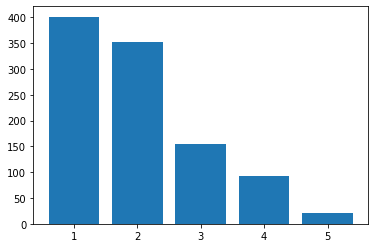

In [10]:
# plot shape of company Jan 2016

x=[1,2,3,4,5]
y= Jan16_df['Designation'].value_counts()
plt.bar(x,y)
plt.show()

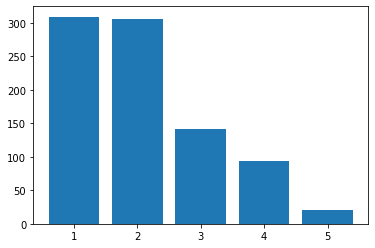

In [12]:
# plot shape of company Mar 2016
Mar16_df = df.loc[df['MMM-YY']=='2016-03-01',:]
# Mar16_df.head()
x=[1,2,3,4,5]
y= Mar16_df['Designation'].value_counts()
plt.bar(x,y)
plt.show()

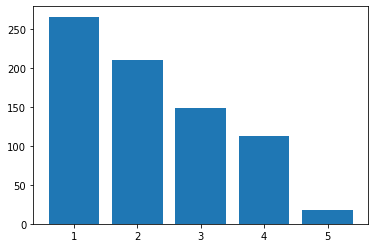

In [16]:
# plot shape of company July 2016
Jul16_df = df.loc[df['MMM-YY']=='2016-07-01',:]
# Jul16_df.head()
x=[1,2,3,4,5]
y= Jul16_df['Designation'].value_counts()
plt.bar(x,y)
plt.show()

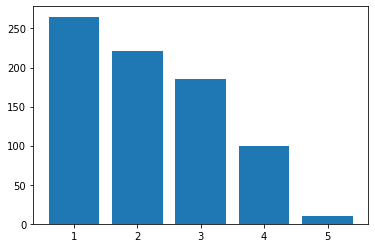

In [18]:
# plot shape of company Nov 2016
Nov16_df = df.loc[df['MMM-YY']=='2016-11-01',:]
# Nov16_df.head()
x=[1,2,3,4,5]
y= Nov16_df['Designation'].value_counts()
plt.bar(x,y)
plt.show()

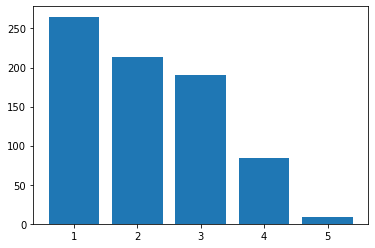

In [22]:
# plot shape of company Feb 2017
Feb17_df = df.loc[df['MMM-YY']=='2017-02-01',:]
# Feb17_df.head()
x=[1,2,3,4,5]
y= Feb17_df['Designation'].value_counts()
plt.bar(x,y)
plt.show()

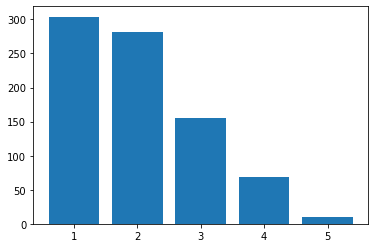

In [20]:
# plot shape of company Dec 2017
Dec17_df = df.loc[df['MMM-YY']=='2017-12-01',:]
# Dec17_df.head()
x=[1,2,3,4,5]
y= Dec17_df['Designation'].value_counts()
plt.bar(x,y)
plt.show()

In [23]:
# Findings: 'shape' of company does not change. Get % values for presentation

In [24]:
# Does the spread of designations leaving match the shape of the company?

In [25]:
# show leavers rating at leaving month
# same for 6 months prior to leaving if time permits

In [ ]:
# is there any bias regarding age?
# same business value = same salary. 